# Week 10-4 CNN을 이용한 감성 분석

In [10]:
# 데이터 읽기

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

os.chdir(r'C:\Users\USER\kjw\LG전자_25\Week10')
review_df=pd.read_csv("thinq_e_review_result.csv")

review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  
0      ['app', 'longer', 'work', 'updated', 'tell', '...  
1      ['everything', 'worked', 'fine', 'week', 'ago'...  
2      ['app', 'work', 'wired', 'tv', 'connection', '...  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...  
4      ['embarrassing', 'absolutely', 'connect', 'goo...  
...                                                  ...  
11275                   ['good', 'app', 'useful', 'far']  
11276                 ['helpful', 'hope', 'stay', 'way']  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']  
11278                      ['error', 'routed', 'device']  
11279                ['connected', 'washing', 'machine']  

[11280 rows x 5 columns]

In [11]:
# 목표 변수 만들기(이전 예제와 동일)
del_index=review_df[review_df['star']==3].index
review_df.drop(del_index,axis=0,inplace=True)
review_df.shape

(10153, 5)

In [12]:
review_df['sentiment']=review_df['star'].apply(lambda x: 1 if x>=4 else 0)
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0  
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0  
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0  
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0  
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0  
...                                                  ...        ...  
11275                   ['good', 'app', 'useful', 'far']          1  
11276                 ['helpful', 'hope', 'stay', 'way']          1  
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1  
11278                      ['error', 'routed', 'device']          0  
11279                ['connected', 'washing', 'machine']          0  

[10153 rows x 6 columns]

<AxesSubplot:>

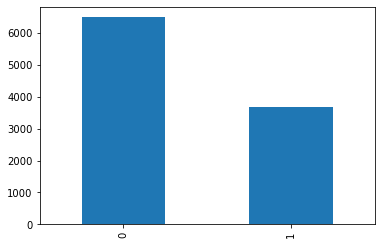

In [13]:
# 목표 변수 분포
review_df['sentiment'].value_counts().plot(kind='bar')

In [14]:
## 데이터 전처리
review_df['comment_n_str']=review_df['comment_n'].apply(lambda x: ' '.join(eval(x)))
review_df

date  star   like  \
0      September 18, 2021     1   12.0   
1      September 19, 2021     1    NaN   
2      September 18, 2021     2    6.0   
3      September 18, 2021     1    2.0   
4       September 1, 2021     1  104.0   
...                   ...   ...    ...   
11275        June 6, 2019     5    NaN   
11276    November 9, 2020     5    NaN   
11277       July 17, 2020     5    NaN   
11278  September 27, 2020     1    NaN   
11279     January 1, 2021     1    NaN   

                                                 comment  \
0      This app no longer works. It has just updated ...   
1      Everything worked fine until a week or so ago....   
2      App doesn't work with wired TV connection. EDI...   
3      I'm trying this again by have Alexa connection...   
4      Just embarrassing. Absolutely, 100%, will not ...   
...                                                  ...   
11275                            Good app. useful so far   
11276           Its been helpful. Hope it stays that way   
11277  Worked like it should and gave me feedback tha...   
11278                            error routed device.. .   
11279               Not connected with washing machine 😞   

                                               comment_n  sentiment  \
0      ['app', 'longer', 'work', 'updated', 'tell', '...          0   
1      ['everything', 'worked', 'fine', 'week', 'ago'...          0   
2      ['app', 'work', 'wired', 'tv', 'connection', '...          0   
3      ['trying', 'alexa', 'connection', 'turn', 'lg'...          0   
4      ['embarrassing', 'absolutely', 'connect', 'goo...          0   
...                                                  ...        ...   
11275                   ['good', 'app', 'useful', 'far']          1   
11276                 ['helpful', 'hope', 'stay', 'way']          1   
11277  ['worked', 'like', 'gave', 'feedback', 'wanting']          1   
11278                      ['error', 'routed', 'device']          0   
11279                ['connected', 'washing', 'machine']          0   

                                           comment_n_str  
0      app longer work updated tell login incorrect t...  
1      everything worked fine week ago connect oven a...  
2      app work wired tv connection edit tried app tv...  
3      trying alexa connection turn lg tv webos tv lg...  
4      embarrassing absolutely connect google home de...  
...                                                  ...  
11275                                good app useful far  
11276                              helpful hope stay way  
11277                  worked like gave feedback wanting  
11278                                error routed device  
11279                          connected washing machine  

[10153 rows x 7 columns]

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment_n_str'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7107,), (3046,))

In [16]:
# 훈련 데이터 리뷰 단어 수 분포
train_word_counts = X_train.apply(lambda x:len(x.split(' ')))

print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 43
리뷰 단어 개수 최소 값: 1
리뷰 단어 개수 평균 값: 13.99
리뷰 단어 개수 표준편차: 9.41
리뷰 단어 개수 중간 값: 11.0
리뷰 단어 개수 제 1 사분위: 6.0
리뷰 단어 개수 제 3 사분위: 21.0


Text(0, 0.5, 'Number of reviews')

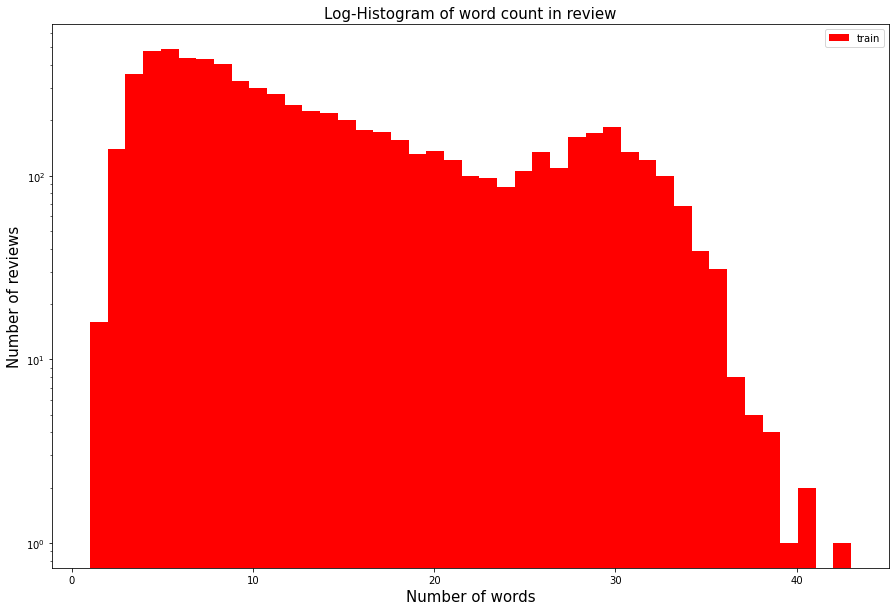

In [17]:
# 리뷰 단어 수 분포
plt.figure(figsize=(15, 10))
plt.hist(train_word_counts, bins=43, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
#plt.yscale('log', nonposy='clip')
plt.yscale('log')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [22]:
# traning data encoding
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_sequences = tokenizer.texts_to_sequences(X_train)
print(text_sequences[0])

word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

print("전체 단어 개수: ", len(word_vocab))

[1347, 1068, 75, 93, 1609, 75, 15, 136, 841, 7, 666, 17, 2460, 3283]
전체 단어 개수:  6442


In [23]:
word_vocab

{'app': 1,
 'lg': 2,
 'tv': 3,
 'work': 4,
 'review': 5,
 'full': 6,
 'use': 7,
 'phone': 8,
 'connect': 9,
 'time': 10,
 'need': 11,
 'washer': 12,
 'update': 13,
 'device': 14,
 'remote': 15,
 'even': 16,
 'wifi': 17,
 'control': 18,
 'dryer': 19,
 'get': 20,
 'great': 21,
 'good': 22,
 'machine': 23,
 'smart': 24,
 'permission': 25,
 'location': 26,
 'make': 27,
 'cycle': 28,
 'like': 29,
 'google': 30,
 'home': 31,
 'turn': 32,
 'would': 33,
 'call': 34,
 'washing': 35,
 'product': 36,
 'appliance': 37,
 'working': 38,
 'access': 39,
 'feature': 40,
 'easy': 41,
 'new': 42,
 'able': 43,
 'want': 44,
 'notification': 45,
 'option': 46,
 'ac': 47,
 'one': 48,
 'using': 49,
 'account': 50,
 'know': 51,
 'say': 52,
 'start': 53,
 'love': 54,
 'also': 55,
 'keep': 56,
 'add': 57,
 'useless': 58,
 'problem': 59,
 'well': 60,
 'connected': 61,
 'issue': 62,
 'really': 63,
 'still': 64,
 'set': 65,
 'useful': 66,
 'please': 67,
 'give': 68,
 'without': 69,
 'tried': 70,
 'see': 71,
 'fridg

In [24]:
data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

In [25]:
MAX_SEQUENCE_LENGTH = 43 
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

# 레이블 정보를 numpy 배열로
train_labels = np.array(y_train)
print('Shape of label tensor:', train_labels.shape)

Shape of train data:  (7107, 43)
Shape of label tensor: (7107,)


In [26]:
# test data encoding
text_sequences = tokenizer.texts_to_sequences(X_test)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of test data: ', test_inputs.shape)

# 레이블 정보를 numpy 배열로
test_labels = np.array(y_test)
print('Shape of label tensor:', test_labels.shape)

Shape of test data:  (3046, 43)
Shape of label tensor: (3046,)


In [27]:
# 성능 평가 함수(앞과 동일)

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score 
from sklearn.metrics import recall_score, f1_score, roc_auc_score

def get_clf_eval(y_test=None, pred=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [28]:
# CNN Packages

import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import layers

In [31]:
train_inputs.shape

(7107, 43)

In [38]:
# 모델 하이퍼파라미터 정의
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_inputs.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': data_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [35]:
# 랜덤 시드 고정

SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)

In [36]:
# 클래스 형태로 모형 정의하기

class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [39]:
# 모형 생성과 학습 정의

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
# 체크포인트 정의

In [40]:
DATA_OUT_PATH = './data_out/'
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./data_out/cnn_classifier_en -- Folder already exists 



In [41]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [42]:
# 모델 학습
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALID_SPLIT, 
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
13/13 [==============================] - 3s 154ms/step - loss: 0.6233 - accuracy: 0.6501 - val_loss: 0.5787 - val_accuracy: 0.6948

Epoch 00001: val_accuracy improved from -inf to 0.69480, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 2/10
13/13 [==============================] - 2s 125ms/step - loss: 0.5209 - accuracy: 0.7394 - val_loss: 0.4512 - val_accuracy: 0.7890

Epoch 00002: val_accuracy improved from 0.69480 to 0.78903, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 3/10
13/13 [==============================] - 2s 133ms/step - loss: 0.4159 - accuracy: 0.8107 - val_loss: 0.3914 - val_accuracy: 0.8228

Epoch 00003: val_accuracy improved from 0.78903 to 0.82278, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 4/10
13/13 [==============================] - 2s 141ms/step - loss: 0.3348 - accuracy: 0.8576 - val_loss: 0.3513 - val_accuracy: 0.8523

Epoch 00004: val_accuracy improved from 0.82278 to 0.85232, saving model to ./data_

In [43]:
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string], '')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()


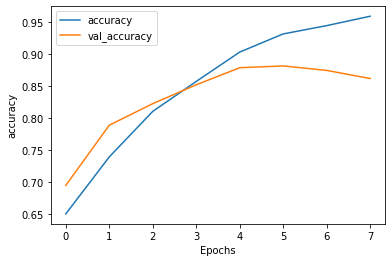

In [44]:
plot_graphs(history, 'accuracy')

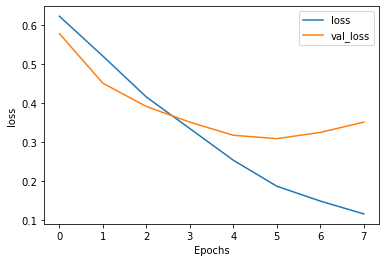

In [45]:
plot_graphs(history, 'loss')

In [46]:
# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [47]:
predictions = model.predict(test_inputs, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [48]:
predictions

array([0.13965973, 0.13598242, 0.97616506, ..., 0.908115  , 0.12292722,
       0.7052369 ], dtype=float32)

In [49]:
pred=[1 if predictions[i]> 0.5 else 0 for i in range(0,predictions.shape[0])]

In [50]:
get_clf_eval(y_test, pred)

오차 행렬
[[1736  225]
 [ 201  884]]
정확도: 0.8601, 정밀도: 0.7971, 재현율: 0.8147,    F1: 0.8058, AUC:0.8500


In [ ]:
### 전처리 안된 comment로 다시 시도

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test= train_test_split(review_df['comment'], review_df['sentiment'], test_size=0.3, random_state=156)

X_train.shape, X_test.shape

((7107,), (3046,))

In [32]:
# 훈련 데이터 리뷰 단어 수 분포
train_word_counts = X_train.apply(lambda x:len(x.split(' ')))

print('리뷰 단어 개수 최대 값: {}'.format(np.max(train_word_counts)))
print('리뷰 단어 개수 최소 값: {}'.format(np.min(train_word_counts)))
print('리뷰 단어 개수 평균 값: {:.2f}'.format(np.mean(train_word_counts)))
print('리뷰 단어 개수 표준편차: {:.2f}'.format(np.std(train_word_counts)))
print('리뷰 단어 개수 중간 값: {}'.format(np.median(train_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('리뷰 단어 개수 제 1 사분위: {}'.format(np.percentile(train_word_counts, 25)))
print('리뷰 단어 개수 제 3 사분위: {}'.format(np.percentile(train_word_counts, 75)))

리뷰 단어 개수 최대 값: 71
리뷰 단어 개수 최소 값: 2
리뷰 단어 개수 평균 값: 26.33
리뷰 단어 개수 표준편차: 18.01
리뷰 단어 개수 중간 값: 21.0
리뷰 단어 개수 제 1 사분위: 11.0
리뷰 단어 개수 제 3 사분위: 40.0


C:\Users\USER\AppData\Local\Temp/ipykernel_12352/3785535425.py:6: MatplotlibDeprecationWarning: The 'nonposy' parameter of __init__() has been renamed 'nonpositive' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.yscale('log', nonposy='clip')


Text(0, 0.5, 'Number of reviews')

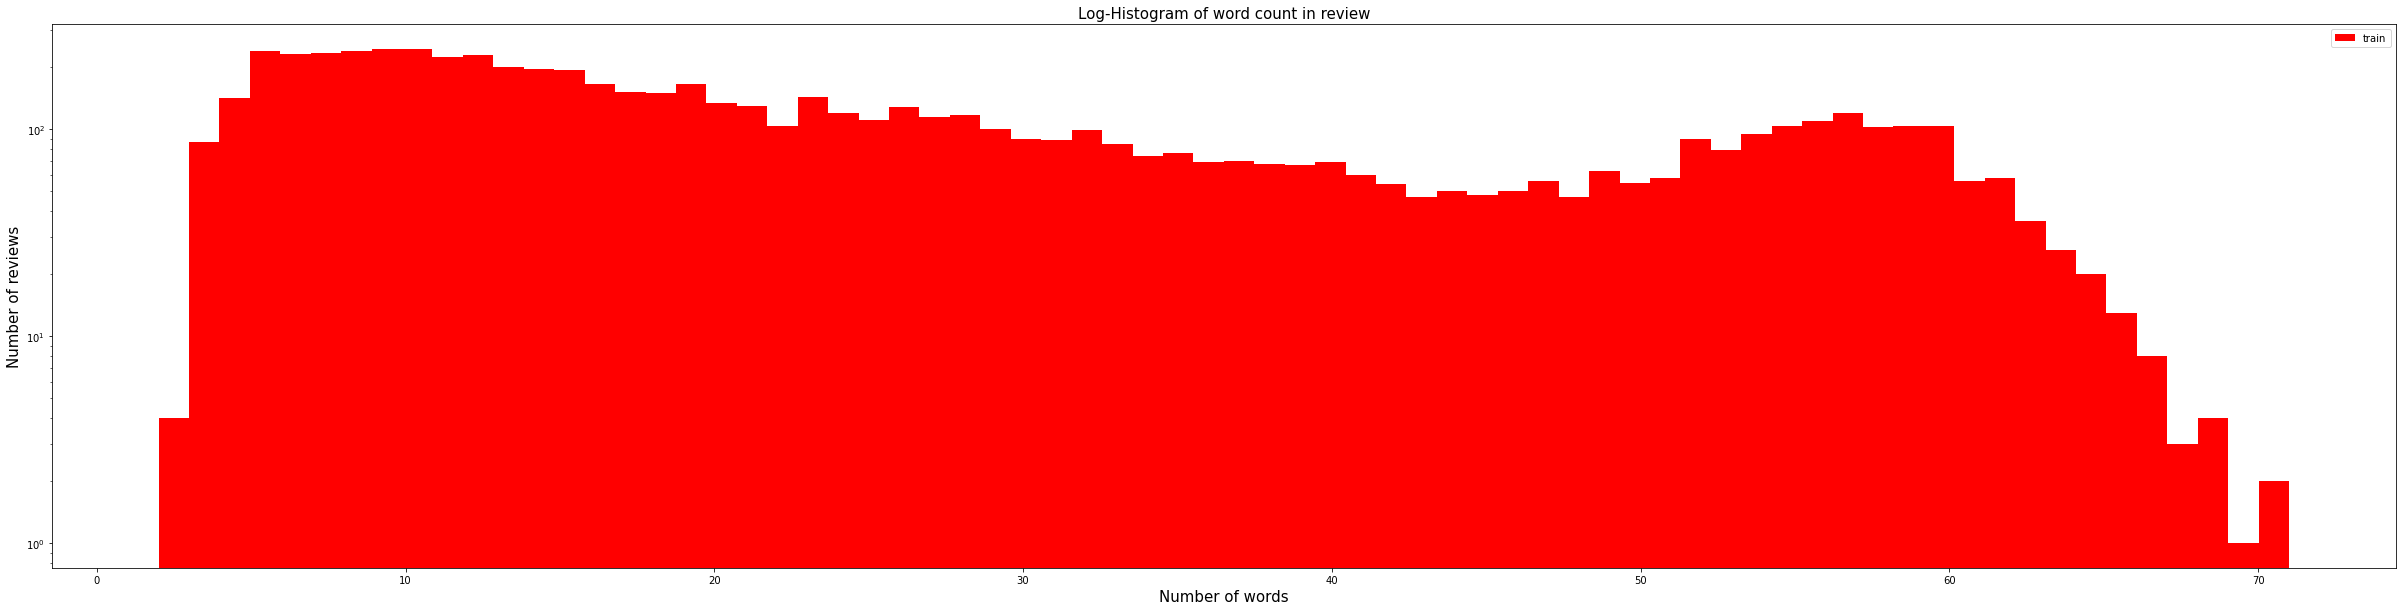

In [33]:
# 리뷰 단어 수 분포

plt.figure(figsize=(42, 10))
plt.hist(train_word_counts, bins=70, facecolor='r',label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [34]:
# traning data encoding
from tensorflow.python.keras.preprocessing.sequence import pad_sequences
from tensorflow.python.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
text_sequences = tokenizer.texts_to_sequences(X_train)
print(text_sequences[0])

word_vocab = tokenizer.word_index
word_vocab["<PAD>"] = 0

print("전체 단어 개수: ", len(word_vocab))

word_vocab

data_configs = {}

data_configs['vocab'] = word_vocab
data_configs['vocab_size'] = len(word_vocab)

[64, 1619, 1272, 191, 199, 37, 1917, 364, 191, 14, 51, 228, 93, 3925, 1, 25, 16, 840, 54, 2923, 64, 14, 3926]
전체 단어 개수:  7812


In [35]:
MAX_SEQUENCE_LENGTH = 71 
train_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of train data: ', train_inputs.shape)

# 레이블 정보를 numpy 배열로
train_labels = np.array(y_train)
print('Shape of label tensor:', train_labels.shape)

Shape of train data:  (7107, 71)
Shape of label tensor: (7107,)


In [36]:
# test data encoding
text_sequences = tokenizer.texts_to_sequences(X_test)
test_inputs = pad_sequences(text_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
print('Shape of test data: ', test_inputs.shape)

# 레이블 정보를 numpy 배열로
test_labels = np.array(y_test)
print('Shape of label tensor:', test_labels.shape)

Shape of test data:  (3046, 71)
Shape of label tensor: (3046,)


In [37]:
# 모델 하이퍼파라미터 정의
model_name = 'cnn_classifier_en'
BATCH_SIZE = 512
NUM_EPOCHS = 10
VALID_SPLIT = 0.1
MAX_LEN = train_inputs.shape[1]

kargs = {'model_name': model_name,
        'vocab_size': data_configs['vocab_size'],
        'embedding_size': 128,
        'num_filters': 100,
        'dropout_rate': 0.5,
        'hidden_dimension': 250,
        'output_dimension':1}

In [38]:
# 클래스 형태로 모형 정의하기

class CNNClassifier(tf.keras.Model):
    
    def __init__(self, **kargs):
        super(CNNClassifier, self).__init__(name=kargs['model_name'])
        self.embedding = layers.Embedding(input_dim=kargs['vocab_size'],
                                     output_dim=kargs['embedding_size'])
        self.conv_list = [layers.Conv1D(filters=kargs['num_filters'],
                                   kernel_size=kernel_size,
                                   padding='valid',
                                   activation=tf.keras.activations.relu,
                                   kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
                     for kernel_size in [3,4,5]]
        self.pooling = layers.GlobalMaxPooling1D()
        self.dropout = layers.Dropout(kargs['dropout_rate'])
        self.fc1 = layers.Dense(units=kargs['hidden_dimension'],
                           activation=tf.keras.activations.relu,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
        self.fc2 = layers.Dense(units=kargs['output_dimension'],
                           activation=tf.keras.activations.sigmoid,
                           kernel_constraint=tf.keras.constraints.MaxNorm(max_value=3.))
    def call(self, x):
        x = self.embedding(x)
        x = self.dropout(x)
        x = tf.concat([self.pooling(conv(x)) for conv in self.conv_list], axis=-1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [39]:
# 모형 생성과 학습 정의

model = CNNClassifier(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=[tf.keras.metrics.BinaryAccuracy(name='accuracy')])

In [ ]:
# 체크포인트 정의

In [40]:
DATA_OUT_PATH = './data_out/'
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001,patience=2)

checkpoint_path = DATA_OUT_PATH + model_name + '/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{} -- Folder already exists \n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{} -- Folder create complete \n".format(checkpoint_dir))

./data_out/cnn_classifier_en -- Folder already exists 



In [41]:
cp_callback = ModelCheckpoint(
    checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)

In [42]:
# 모델 학습
history = model.fit(train_inputs, train_labels, batch_size=BATCH_SIZE, 
                    epochs=NUM_EPOCHS, validation_split=VALID_SPLIT, 
                    callbacks=[earlystop_callback, cp_callback])

Epoch 1/10
13/13 [==============================] - 3s 196ms/step - loss: 0.6487 - accuracy: 0.6132 - val_loss: 0.6256 - val_accuracy: 0.6568

Epoch 00001: val_accuracy improved from -inf to 0.65682, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 2/10
13/13 [==============================] - 2s 189ms/step - loss: 0.5774 - accuracy: 0.6937 - val_loss: 0.5138 - val_accuracy: 0.7904

Epoch 00002: val_accuracy improved from 0.65682 to 0.79044, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 3/10
13/13 [==============================] - 2s 187ms/step - loss: 0.4319 - accuracy: 0.8132 - val_loss: 0.3780 - val_accuracy: 0.8481

Epoch 00003: val_accuracy improved from 0.79044 to 0.84810, saving model to ./data_out/cnn_classifier_en\weights.h5
Epoch 4/10
13/13 [==============================] - 3s 196ms/step - loss: 0.3344 - accuracy: 0.8652 - val_loss: 0.3232 - val_accuracy: 0.8734

Epoch 00004: val_accuracy improved from 0.84810 to 0.87342, saving model to ./data_

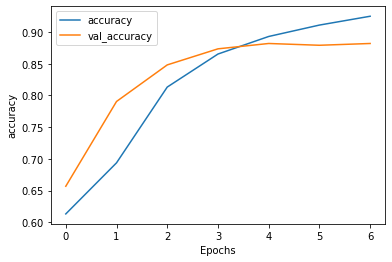

In [43]:
plot_graphs(history, 'accuracy')

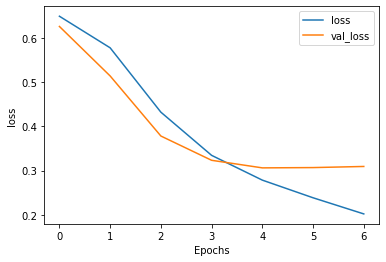

In [44]:
plot_graphs(history, 'loss')

In [45]:
# 베스트 모델 불러오기
SAVE_FILE_NM = 'weights.h5'

model.load_weights(os.path.join(DATA_OUT_PATH, model_name, SAVE_FILE_NM))

In [46]:
predictions = model.predict(test_inputs, batch_size=BATCH_SIZE)
predictions = predictions.squeeze(-1)

In [47]:
predictions

array([0.8371949 , 0.11470851, 0.77619773, ..., 0.8640953 , 0.30520576,
       0.2327447 ], dtype=float32)

In [48]:
pred=[1 if predictions[i]> 0.5 else 0 for i in range(0,predictions.shape[0])]

In [49]:
get_clf_eval(y_test, pred)

오차 행렬
[[1751  210]
 [ 217  868]]
정확도: 0.8598, 정밀도: 0.8052, 재현율: 0.8000,    F1: 0.8026, AUC:0.8465
